In [2]:
import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, PolynomialFeatures , StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import GridSearchCV

In [3]:
data = pd.read_csv('../data/voiture_model.csv')
data

,etat_de_route,turbo,type_vehicule,roues_motrices,emplacement_moteur,marque,modele,empattement,longueur_voiture,largeur_voiture,poids_vehicule,taille_moteur,taux_alésage,chevaux,consommation_ville,consommation_autoroute,prix
0,3,standard,cabriolet,propulsion,avant,ALFA-ROMEO,GIULIA,225.0,428.8,162.8,1155.752416,130,88.1,111,11.20,8.71,13495.0
1,3,standard,cabriolet,propulsion,avant,ALFA-ROMEO,STELVIO,225.0,428.8,162.8,1155.752416,130,88.1,111,11.20,8.71,16500.0
2,1,standard,hayon,propulsion,avant,ALFA-ROMEO,QUADRIFOGLIO,240.0,434.8,166.4,1280.490216,152,68.1,154,12.38,9.05,16500.0
3,2,standard,berline,traction,avant,AUDI,100LS,253.5,448.6,168.1,1060.044504,109,81.0,102,9.80,7.84,13950.0
4,2,standard,berline,quatre_roues_motrices,avant,AUDI,100LS,252.5,448.6,168.7,1280.943808,136,81.0,115,13.07,10.69,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,-1,standard,berline,propulsion,avant,VOLVO,145E SW,277.1,479.6,175.0,1339.003584,141,96.0,114,10.23,8.40,16845.0
199,-1,turbo,berline,propulsion,avant,VOLVO,144EA,277.1,479.6,174.8,1383.002008,141,96.0,160,12.38,9.41,19045.0
200,-1,standard,berline,propulsion,avant,VOLVO,244 DL,277.1,479.6,175.0,1366.219104,173,90.9,134,13.07,10.23,21485.0
201,-1,turbo,berline,propulsion,avant,VOLVO,246,277.1,479.6,175.0,1459.205464,145,76.5,106,9.05,8.71,22470.0


In [4]:
# Préparez vos données (séparez les caractéristiques et la cible)
X = data.drop(['prix'], axis=1)
y = data['prix']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2 , random_state=42)

# Identifiez les colonnes numériques et catégorielles
numerical_columns = ['empattement', 'longueur_voiture', 'largeur_voiture', 'poids_vehicule', 'taille_moteur', 'taux_alésage', 'chevaux', 'consommation_ville', 'consommation_autoroute']
categorical_columns = ['etat_de_route', 'turbo', 'type_vehicule', 'roues_motrices', 'emplacement_moteur', 'marque', 'modele']


## RANDOM FOREST MODEL

In [5]:
# Créer un transformateur pour les variables numériques
num_transformer = Pipeline(steps=[
    ('Normalisation', MinMaxScaler()),
])

# Créer un transformateur pour les variables catégorielles
cat_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Créer un préprocesseur pour combiner les deux transformateurs
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, numerical_columns),
        ('cat', cat_transformer, categorical_columns)
    ])

In [6]:
random_forest_params = {
    'random_forest__n_estimators': [50, 100, 200],
    'random_forest__max_depth': [None, 10, 20, 30],
    'random_forest__min_samples_split': [2, 5, 10],
    'random_forest__min_samples_leaf': [1, 2, 4],
    'random_forest__max_features': ['auto', 'sqrt', 'log2'],
}

In [7]:
random_forest_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('random_forest', RandomForestRegressor(random_state=42))
])

* Sur un projet de tarification de voitures d'occasion, il peut être important de minimiser les erreurs de prédiction importantes. Dans cette situation, il peut être judicieux d'utiliser le RMSE comme métrique pour évaluer les modèles et choisir le meilleur modèle. Les valeurs d'erreur sont plus importantes que les valeurs moyennes. Par exemple, les erreurs de 10 000 dollars sont plus importantes que les erreurs de 100 dollars.

In [8]:
random_forest_grid = GridSearchCV(random_forest_pipeline, param_grid=random_forest_params, cv=5, scoring='neg_root_mean_squared_error')

In [9]:
random_forest_grid.fit(X_train, y_train)

KeyboardInterrupt: 

In [ ]:
print("Best parameters for Random Forest:", random_forest_grid.best_params_)
print("Best score for Random Forest:", random_forest_grid.best_score_)

Best parameters for Random Forest: {'random_forest__max_depth': 10, 'random_forest__max_features': 'auto', 'random_forest__min_samples_leaf': 2, 'random_forest__min_samples_split': 2, 'random_forest__n_estimators': 200}
Best score for Random Forest: -2292.357369660788


In [ ]:
y_pred_forest_best = random_forest_grid.predict(X_test)

rmse_forest_best = np.sqrt(mean_squared_error(y_test, y_pred_forest_best))

r2_forest_best = r2_score(y_test, y_pred_forest_best)

mae_forest_best = mean_absolute_error(y_test, y_pred_forest_best)


In [ ]:
print("\nRandom Forest with best parameters:")
print("RMSE:", rmse_forest_best)
print("R2:", r2_forest_best)
print("MAE:", mae_forest_best)


Random Forest with best parameters:
RMSE: 2317.2658731464135
R2: 0.92964004492736
MAE: 1569.5586030514642


In [ ]:
results_df_best = pd.DataFrame({"Random Forest (Best)": y_pred_forest_best,"Actual": y_test})
results_df_best['Random Forest (Best)'] = results_df_best['Random Forest (Best)'].apply(lambda x: round(x, 3))
results_df_best['Difference'] = results_df_best['Random Forest (Best)'] - results_df_best['Actual']
results_df_best

,Random Forest (Best),Actual,Difference
15,33466.117,30760.000,2706.117
9,17776.284,17859.167,-82.883
115,14079.236,16630.000,-2550.764
78,6648.639,6669.000,-20.361
66,10915.840,18344.000,-7428.160
45,7299.699,8916.500,-1616.801
143,11343.867,11259.000,84.867
177,17850.895,15998.000,1852.895
200,19261.118,21485.000,-2223.882
180,8136.377,7775.000,361.377


### Learning curves

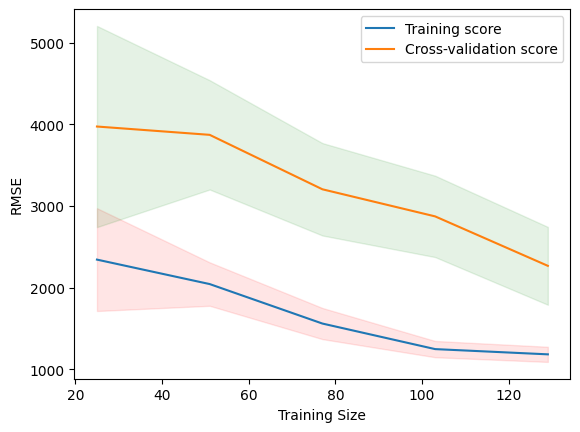

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.metrics import mean_squared_error

best_model = random_forest_grid.best_estimator_

train_sizes, train_scores, test_scores = learning_curve(
    best_model, X_train, y_train,
    train_sizes=np.linspace(0.2, 1.0, 5), cv=5,
    scoring="neg_mean_squared_error",
)

train_scores_rmse = np.sqrt(-train_scores)
test_scores_rmse = np.sqrt(-test_scores)

plt.plot(train_sizes, np.mean(train_scores_rmse, axis=1), label="Training score")
plt.plot(train_sizes, np.mean(test_scores_rmse, axis=1), label="Cross-validation score")

plt.fill_between(train_sizes, np.mean(train_scores_rmse, axis=1) - np.std(train_scores_rmse, axis=1),
                 np.mean(train_scores_rmse, axis=1) + np.std(train_scores_rmse, axis=1), alpha=0.1, color="r")
plt.fill_between(train_sizes, np.mean(test_scores_rmse, axis=1) - np.std(test_scores_rmse, axis=1),
                 np.mean(test_scores_rmse, axis=1) + np.std(test_scores_rmse, axis=1), alpha=0.1, color="g")

plt.xlabel("Training Size")
plt.ylabel("RMSE")
plt.legend(loc="best")
plt.show()

In [ ]:
for train_size, train_score_mean, train_score_std, test_score_mean, test_score_std in zip(train_sizes, np.mean(train_scores_rmse, axis=1), np.std(train_scores_rmse, axis=1), np.mean(test_scores_rmse, axis=1), np.std(test_scores_rmse, axis=1)):
    print(f"Training Size: {train_size}")
    print(f"Training Score (RMSE) - Mean: {train_score_mean:.2f}, Std: {train_score_std:.2f}")
    print(f"Cross-validation Score (RMSE) - Mean: {test_score_mean:.2f}, Std: {test_score_std:.2f}")
    print()

Training Size: 25
Training Score (RMSE) - Mean: 2344.59, Std: 629.30
Cross-validation Score (RMSE) - Mean: 3973.59, Std: 1231.47

Training Size: 51
Training Score (RMSE) - Mean: 2045.06, Std: 265.92
Cross-validation Score (RMSE) - Mean: 3871.76, Std: 669.09

Training Size: 77
Training Score (RMSE) - Mean: 1561.78, Std: 190.61
Cross-validation Score (RMSE) - Mean: 3205.28, Std: 565.68

Training Size: 103
Training Score (RMSE) - Mean: 1249.00, Std: 99.57
Cross-validation Score (RMSE) - Mean: 2873.57, Std: 498.05

Training Size: 129
Training Score (RMSE) - Mean: 1184.82, Std: 92.74
Cross-validation Score (RMSE) - Mean: 2268.17, Std: 476.52



In [ ]:
data

,etat_de_route,turbo,type_vehicule,roues_motrices,emplacement_moteur,marque,modele,empattement,longueur_voiture,largeur_voiture,poids_vehicule,taille_moteur,taux_alésage,chevaux,consommation_ville,consommation_autoroute,prix
0,3,standard,cabriolet,propulsion,avant,ALFA-ROMEO,GIULIA,225.0,428.8,162.8,1155.752416,130,88.1,111,11.20,8.71,13495.0
1,3,standard,cabriolet,propulsion,avant,ALFA-ROMEO,STELVIO,225.0,428.8,162.8,1155.752416,130,88.1,111,11.20,8.71,16500.0
2,1,standard,hayon,propulsion,avant,ALFA-ROMEO,QUADRIFOGLIO,240.0,434.8,166.4,1280.490216,152,68.1,154,12.38,9.05,16500.0
3,2,standard,berline,traction,avant,AUDI,100LS,253.5,448.6,168.1,1060.044504,109,81.0,102,9.80,7.84,13950.0
4,2,standard,berline,quatre_roues_motrices,avant,AUDI,100LS,252.5,448.6,168.7,1280.943808,136,81.0,115,13.07,10.69,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,-1,standard,berline,propulsion,avant,VOLVO,145E SW,277.1,479.6,175.0,1339.003584,141,96.0,114,10.23,8.40,16845.0
199,-1,turbo,berline,propulsion,avant,VOLVO,144EA,277.1,479.6,174.8,1383.002008,141,96.0,160,12.38,9.41,19045.0
200,-1,standard,berline,propulsion,avant,VOLVO,244 DL,277.1,479.6,175.0,1366.219104,173,90.9,134,13.07,10.23,21485.0
201,-1,turbo,berline,propulsion,avant,VOLVO,246,277.1,479.6,175.0,1459.205464,145,76.5,106,9.05,8.71,22470.0


In [ ]:
import pickle

# Enregistrer le modèle dans un fichier pickle
with open('../models/random_forest.pkl', 'wb') as file:
    pickle.dump(random_forest_grid, file)

In [ ]:
X_test

,etat_de_route,turbo,type_vehicule,roues_motrices,emplacement_moteur,marque,modele,empattement,longueur_voiture,largeur_voiture,poids_vehicule,taille_moteur,taux_alésage,chevaux,consommation_ville,consommation_autoroute
15,0,standard,berline,propulsion,avant,BMW,X4,262.9,480.1,169.9,1465.102160,209,91.9,182,14.70,10.69
9,0,turbo,hayon,quatre_roues_motrices,avant,AUDI,5000S DIESEL,252.7,452.6,172.5,1384.816376,131,79.5,160,14.70,10.69
115,0,standard,berline,propulsion,avant,PEUGEOT,504,274.1,474.2,173.7,1394.795400,120,87.9,97,12.38,9.80
78,2,standard,hayon,traction,avant,MITSUBISHI,OUTLANDER,238.0,399.5,163.6,908.998368,92,75.4,68,7.59,6.19
66,0,standard,berline,propulsion,avant,MAZDA,RX-7GS,266.4,444.5,167.9,1224.698400,134,87.1,72,7.59,6.03
45,0,standard,berline,traction,avant,ISUZU,D-MAX V-CROSS,240.0,396.0,161.5,865.907128,90,77.0,70,6.19,5.47
143,0,turbo,berline,quatre_roues_motrices,avant,SUBARU,R2,246.4,436.9,166.1,1138.515920,108,91.9,111,9.80,8.11
177,3,standard,hayon,propulsion,avant,TOYOTA,CORONA,261.4,466.1,172.0,1368.033472,171,83.1,161,12.38,9.80
200,-1,standard,berline,propulsion,avant,VOLVO,244 DL,277.1,479.6,175.0,1366.219104,173,90.9,134,13.07,10.23
180,2,standard,berline,traction,avant,VOLKSWAGEN,RABBIT,247.1,436.1,166.4,1025.571512,97,76.5,52,6.36,5.11


In [ ]:
data['modele'].value_counts()

504         6
COROLLA     6
CORONA      6
DL          4
CIVIC       3
           ..
GLC4        1
RX2COUPE    1
RX3         1
XK          1
246         1
Name: modele, Length: 140, dtype: int64

In [ ]:
# va chercher le modèle 504 et montre moi ses résultats data
data[data['modele'] == "COROLLA"]

NameError: name 'data' is not defined